In [1]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
site_data_years = {'KLOO' : np.arange(1988, 2017).astype(int),
                   'SULPHUR' : np.arange(1988, 2018).astype(int),
                   'CHITTY' : np.arange(1991, 2018).astype(int),
                   'SILVER' : np.arange(1999, 2018).astype(int)}
site_mast_years = {'KLOO' : [1993, 1998, 2005, 2010, 2014],
                   'SULPHUR' : [1993, 1998, 2005, 2010, 2014],
                   'CHITTY' : [1998, 2010, 2014],
                   'SILVER' : [2005, 2010, 2014]}
vi_names = ['NDVI', 'EVI', 'GRVI', 'RSR', 'NDII', 'NBR', 'KTTC_GRN', 'KTTC_WET']
nvi_names = len(vi_names)
sites = ['CHITTY', 'KLOO', 'SILVER', 'SULPHUR']
relative_years = [-3, -2, -1, 0, 1]

In [3]:
infname = 'ALL_SITES_EVENTS_VI_stats_cleaned.csv'
vi_df = pd.read_csv(infname, index_col=None)
vi_df

,date,year,doy,dyear,footprint,sat,npx,npx_frac,ndvi_mean,ndvi_stdv,...,rsr_stdv,ndii_mean,ndii_stdv,nbr_mean,nbr_stdv,kttc_grn_mean,kttc_grn_stdv,kttc_wet_mean,kttc_wet_stdv,site_name
0,19880706,1988,188,1988.515068,P62R17,LT04,328,0.888889,0.477138,0.041169,...,0.302791,0.238592,0.029029,0.472007,0.040727,0.057402,0.007481,-0.040148,0.007479,SILVER
1,19880723,1988,205,1988.561644,P61R17,LT05,368,0.997290,0.629016,0.033033,...,0.494901,0.202677,0.051400,0.462723,0.057998,0.096466,0.013127,-0.071639,0.016872,CHITTY
2,19880723,1988,205,1988.561644,P61R17,LT05,203,1.000000,0.666393,0.041205,...,0.829037,0.234129,0.061962,0.506975,0.070730,0.116915,0.027333,-0.074126,0.024839,KLOO
3,19880723,1988,205,1988.561644,P61R17,LT05,369,1.000000,0.634366,0.034932,...,0.533875,0.207353,0.037427,0.487055,0.046634,0.083612,0.011945,-0.058433,0.010085,SILVER
4,19880723,1988,205,1988.561644,P61R17,LT05,215,1.000000,0.663413,0.032836,...,0.594832,0.259950,0.062968,0.529972,0.064269,0.105995,0.013557,-0.060506,0.018075,SULPHUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,20170918,2017,261,2017.715068,P60R18,LC08,336,0.910569,0.628613,0.113303,...,1.600689,0.284807,0.094565,0.446425,0.165698,0.066453,0.015888,-0.045673,0.024724,CHITTY
785,20170924,2017,267,2017.731507,P62R17,LE07,211,0.578082,0.589159,0.051072,...,0.226879,0.367255,0.086217,0.614144,0.091830,0.053285,0.005372,-0.016744,0.010485,CHITTY
786,20170924,2017,267,2017.731507,P62R17,LE07,53,0.143631,0.449388,0.083521,...,0.250601,0.236713,0.137930,0.436035,0.149092,0.013165,0.006035,-0.012764,0.009957,SILVER
787,20170924,2017,267,2017.731507,P62R17,LE07,145,0.728643,0.481550,0.071896,...,0.199026,0.314071,0.120802,0.531290,0.109770,0.030644,0.017331,-0.016223,0.013638,KLOO


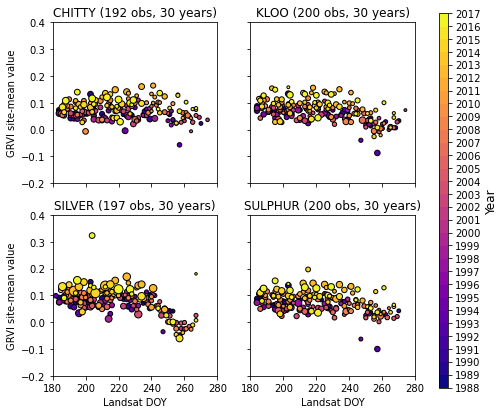

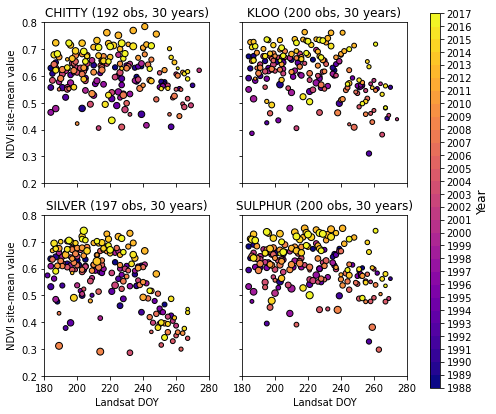

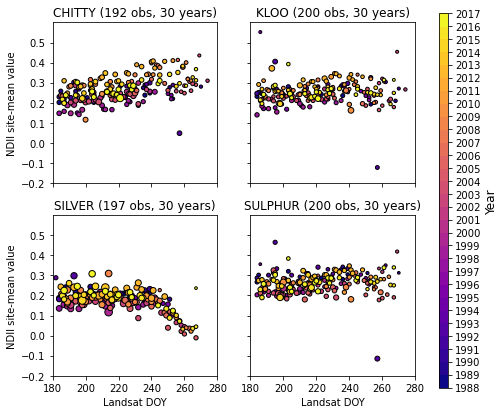

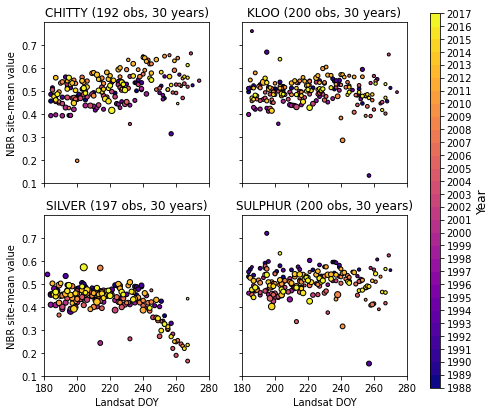

In [4]:
# plot site-mean VI observations against DOY for each site
#
all_years = sorted(list(set(list(vi_df['year']))))
nyears = len(all_years)
# all_years.append(np.max(all_years)+1)
cmap = plt.cm.plasma
cmaplist = [cmap(i) for i in range(cmap.N-1)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap_years', cmaplist, cmap.N-1)
bounds = np.linspace(0, nyears, nyears)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N-1)
#
for vi in ['GRVI', 'NDVI', 'NDII', 'NBR']:
    vi_vals = np.array(vi_df['%s_mean' % vi.lower()])
    vi_range_min = np.floor(np.min(vi_vals) * 10.0) / 10.0
    vi_range_max = np.ceil(np.max(vi_vals) * 10.0) / 10.0
    if (vi_range_max - vi_range_min) < 1.0:
        yticks = np.arange(vi_range_min, vi_range_max, 0.1)
    else:
        yticks = np.arange(vi_range_min, vi_range_max, 1)
    #
    fig, ax1 = plt.subplots(2, 2, sharex=True, sharey=True)
    fig.set_size_inches(6.5, 6.5)
    for i, site_name in enumerate(sites):
        ax = plt.subplot(2, 2, i+1)
        site_df = vi_df[vi_df['site_name'] == site_name]
        # site_df['marker_size'] = np.array(site_df['npx']) / np.array(site_df['%s_stdv' % vi.lower()]) / 100.0
        site_df['marker_size'] = 1.0 / np.array(site_df['%s_stdv' % vi.lower()])
        site_df.sort_values(by=['marker_size'], ascending=True)
        doy_vals = np.array(site_df['doy'])
        vi_vals = np.array(site_df['%s_mean' % vi.lower()])
        nobs = len(vi_vals)
        vi_sizes = np.array(site_df['marker_size'])
        site_years = np.array(site_df['year'])
        nyears = len(set(site_years))
        color_years = site_years - np.min(site_years)
        plt.scatter(doy_vals, vi_vals, marker='o', c=color_years, edgecolors='k',
                    s=vi_sizes, cmap=cmap, norm=norm)
        plt.xlim([180, 280])
        plt.xticks(fontsize=10)
        plt.ylim([vi_range_min, vi_range_max])
        plt.yticks(yticks, fontsize=10)
        plt.title('%s (%d obs, %d years)' % (site_name, nobs, nyears))
        if i in [0, 1]:
            for xticklabel in ax.get_xticklabels():
                xticklabel.set_visible(False)
        if i in [1, 3]:
            for yticklabel in ax.get_yticklabels():
                yticklabel.set_visible(False)
        if i in [0, 2]:
            plt.ylabel('%s site-mean value' % vi, fontsize=10)
        if i in [2, 3]:
            plt.xlabel('Landsat DOY', fontsize=10)
    ax2 = fig.add_axes([0.95, 0.1, 0.02, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional',
                                   ticks=bounds, boundaries=bounds, format='%1i')
    ax2.set_yticklabels(all_years, fontsize=10)
    ax2.set_ylabel('Year', fontsize=12)
    outfname = '%s_by_DOY_individual_sites_all_years.png' % vi
    plt.savefig(outfname, dpi=300, bbox_inches='tight')

In [5]:
def wls_regression(x_vals, y_vals, y_weights):
    """Get slope, intercept, etc. of time series using WLS regression."""
    if len(x_vals) <= 1:
        return np.nan, np.nan
    x_vals = sm.add_constant(x_vals)
    wls_model = sm.WLS(y_vals, x_vals, weights=y_weights)
    wls_result = wls_model.fit()
    intercept = wls_result.params[0]
    slope = wls_result.params[1]
    return slope, intercept

def get_var_slope_intercept(year_site_df, var_name):
    doy_series = np.array(year_site_df['doy'])
    vi_mean_series = np.array(year_site_df['%s_mean' % var_name])
    vi_stdv_series = np.array(year_site_df['%s_stdv' % var_name])
    vi_weights = np.array(year_site_df['npx_frac']) / vi_stdv_series**2
    slope, intercept = wls_regression(doy_series, vi_mean_series, vi_weights)
    return slope, intercept

In [6]:
cols = ['site_name', 'year']
for vi_name in vi_names:
    cols.append('%s_slope' % vi_name.lower())
    cols.append('%s_intercept' % vi_name.lower())
vi_slopes_df = pd.DataFrame(columns=cols)
df_idx = 0
for i, site_name in enumerate(sites):
    print('processing variables for site %s' % site_name)
    site_vi_df = vi_df[vi_df['site_name'] == site_name]
    site_years = sorted(list(set(list(site_vi_df['year']))))
    for year in site_years:
        data_row = [site_name, year]
        year_site_vi_df = site_vi_df[site_vi_df['year'] == year]
        for vi_name in vi_names:
            vi_slope, vi_intercept = get_var_slope_intercept(year_site_vi_df, vi_name.lower())
            if (vi_name == 'NDII') and np.isnan(vi_slope):
                   print('- not enough points for %s %d regression (%d obs)' %
                         (site_name, year, len(year_site_vi_df)))
            data_row.append(vi_slope)
            data_row.append(vi_intercept)
        vi_slopes_df.loc[df_idx] = data_row
        df_idx += 1
print('%d rows (site-years) processed' % len(vi_slopes_df))
vi_slopes_df.dropna(inplace=True)
vi_slopes_df.reset_index(drop=True, inplace=True)
print('%d valid rows (site-years) remain' % len(vi_slopes_df))

processing variables for site CHITTY
- not enough points for CHITTY 1995 regression (1 obs)
- not enough points for CHITTY 1997 regression (1 obs)
processing variables for site KLOO
- not enough points for KLOO 1997 regression (1 obs)
processing variables for site SILVER
- not enough points for SILVER 1997 regression (1 obs)
processing variables for site SULPHUR
- not enough points for SULPHUR 1997 regression (1 obs)
120 rows (site-years) processed
115 valid rows (site-years) remain


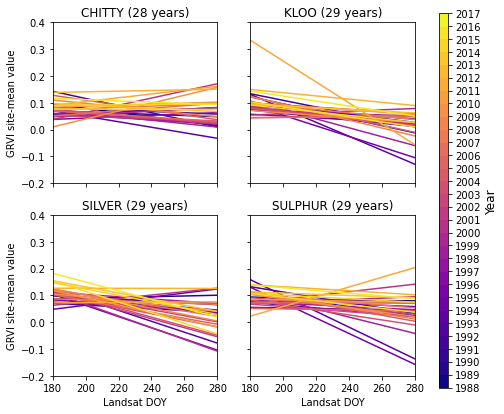

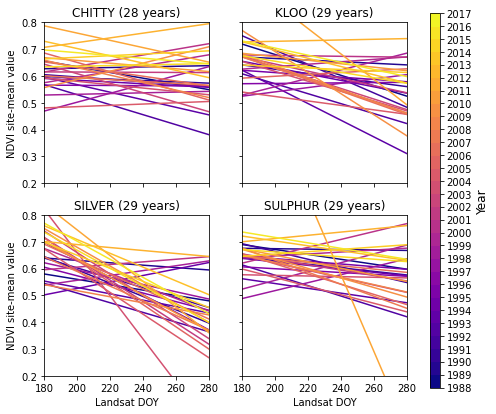

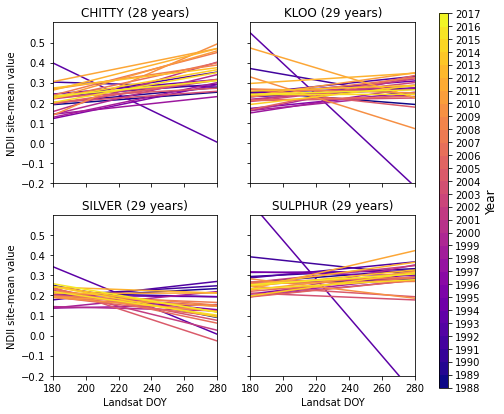

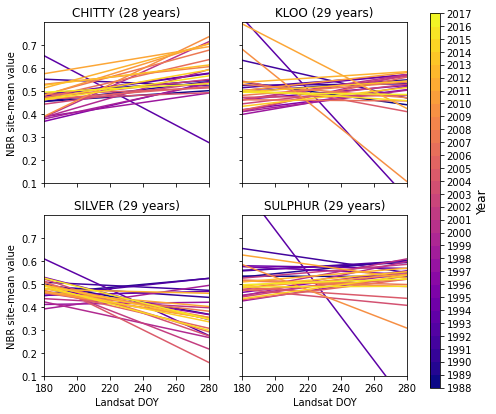

In [7]:
# plot VI regressions against DOY for each site
#
colors = cmap(np.linspace(0, 1, len(all_years)+1))
for vi in ['GRVI', 'NDVI', 'NDII', 'NBR']:
    vi_vals = np.array(vi_df['%s_mean' % vi.lower()])
    vi_range_min = np.floor(np.min(vi_vals) * 10.0) / 10.0
    vi_range_max = np.ceil(np.max(vi_vals) * 10.0) / 10.0
    if (vi_range_max - vi_range_min) < 1.0:
        yticks = np.arange(vi_range_min, vi_range_max, 0.1)
    else:
        yticks = np.arange(vi_range_min, vi_range_max, 1)
    #
    fig, ax1 = plt.subplots(2, 2, sharex=True, sharey=True)
    fig.set_size_inches(6.5, 6.5)
    for i, site_name in enumerate(sites):
        ax = plt.subplot(2, 2, i+1)
        site_df = vi_slopes_df[vi_slopes_df['site_name'] == site_name]
        slopes = np.array(site_df['%s_slope' % vi.lower()])
        intercepts = np.array(site_df['%s_intercept' % vi.lower()])
        site_years = np.array(site_df['year'])
        nyears = len(set(site_years))
        x = np.arange(180, 281)
        nregressions = 0
        for y, year in enumerate(site_years):
            if not np.isnan(slopes[y]):
                y = slopes[y] * x + intercepts[y]
                color_year = year - np.min(site_years)
                plt.plot(x, y, linestyle='-', color=colors[color_year])
                nregressions += 1
        plt.xlim([180, 280])
        plt.xticks(fontsize=10)
        plt.ylim([vi_range_min, vi_range_max])
        plt.yticks(yticks, fontsize=10)
        plt.title('%s (%d years)' % (site_name, nregressions))
        if i in [0, 1]:
            for xticklabel in ax.get_xticklabels():
                xticklabel.set_visible(False)
        if i in [1, 3]:
            for yticklabel in ax.get_yticklabels():
                yticklabel.set_visible(False)
        if i in [0, 2]:
            plt.ylabel('%s site-mean value' % vi, fontsize=10)
        if i in [2, 3]:
            plt.xlabel('Landsat DOY', fontsize=10)
    ax2 = fig.add_axes([0.95, 0.1, 0.02, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional',
                                   ticks=bounds, boundaries=bounds, format='%1i')
    ax2.set_yticklabels(all_years, fontsize=10)
    ax2.set_ylabel('Year', fontsize=12)
    outfname = '%s_WLS_regressions_individual_sites_all_years.png' % vi
    plt.savefig(outfname, dpi=300, bbox_inches='tight')

In [8]:
def add_cone_count_data(df, site_mast_years, relative_years):
    cone_count_df = pd.read_csv('site_cone_counts_sds.csv', index_col=None)
    dfs = list()
    for site_name in sites:
        site_df = df[df['site_name'] == site_name]
        site_cone_count_df = cone_count_df[cone_count_df['site_name'] == site_name]
        site_cone_count_years = list(site_cone_count_df['year'])
        site_cone_count_data = list(site_cone_count_df['cone_count_stdv'])
        #
        years = list(site_df['year'])
        cone_count_sds = list()
        mast_year_binary = list()
        mast_rel_year = list()
        for year in years:
            found_in_data = False
            found_in_rel = False
            if year in site_cone_count_years:
                cone_count_sds.append(site_cone_count_data[site_cone_count_years.index(year)])
                for mast_year in site_mast_years[site_name]:
                    rel_year = int(year - mast_year)
                    if rel_year in relative_years:
                        found_in_rel = True
                        break
                if found_in_rel:
                    mast_rel_year.append(rel_year)
                else:
                    mast_rel_year.append('none')
                if rel_year == 0:
                    mast_year_binary.append(1)
                else:
                    mast_year_binary.append(0)
            else:
                cone_count_sds.append('none')
                mast_rel_year.append('none')
                mast_year_binary.append('none')
        site_df['cone_count_stdv'] = cone_count_sds
        site_df['mast_year'] = mast_year_binary
        site_df['mast_rel_year'] = mast_rel_year
        dfs.append(site_df)
    df = pd.concat(dfs, ignore_index=True)
    #
    # filter out years occurring outside of cone count data periods
    df = df[df['cone_count_stdv'] != 'none']
    return df

print('%d valid rows (site-years) with regressions' % len(vi_slopes_df))
vi_slopes_df_new = add_cone_count_data(vi_slopes_df, site_mast_years, relative_years)
vi_slopes_df_new.reset_index(drop=True, inplace=True)
print('%d valid rows (site-years) with masting data remain' % len(vi_slopes_df_new))
vi_slopes_df_new

115 valid rows (site-years) with regressions
101 valid rows (site-years) with masting data remain


,site_name,year,ndvi_slope,ndvi_intercept,evi_slope,evi_intercept,grvi_slope,grvi_intercept,rsr_slope,rsr_intercept,...,ndii_intercept,nbr_slope,nbr_intercept,kttc_grn_slope,kttc_grn_intercept,kttc_wet_slope,kttc_wet_intercept,cone_count_stdv,mast_year,mast_rel_year
0,CHITTY,1991,-0.000443,0.684854,-0.000462,0.375133,-0.001332,0.382571,0.023647,-4.900797,...,0.348611,-0.000296,0.605934,-0.000280,0.149994,0.000046,-0.054515,-0.410193,0,none
1,CHITTY,1992,-0.001870,0.904095,-0.001104,0.494892,-0.000337,0.119493,-0.051355,12.854535,...,-0.014803,0.000982,0.302128,-0.000407,0.167539,0.000548,-0.163929,-0.250696,0,none
2,CHITTY,1993,-0.001413,0.850148,-0.002341,0.773620,-0.001031,0.255975,-0.040850,11.538076,...,1.112695,-0.003786,1.336327,-0.000856,0.272405,-0.000540,0.067601,-0.374478,0,none
3,CHITTY,1994,-0.000330,0.650185,-0.000293,0.330703,0.000248,0.012083,-0.074210,17.384333,...,0.113409,0.000967,0.308293,-0.000144,0.115083,0.000222,-0.095505,-0.392914,0,none
4,CHITTY,1996,-0.000031,0.571396,-0.000679,0.379893,0.000255,-0.008203,-0.065611,17.004433,...,-0.184793,0.001701,0.062763,-0.000224,0.120303,0.000568,-0.184980,-0.414085,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,SULPHUR,2013,0.000604,0.592042,-0.001382,0.590965,-0.000374,0.207427,-0.088695,24.138790,...,0.043752,0.000605,0.399861,-0.000395,0.180894,0.000382,-0.132851,-0.358921,0,-1
97,SULPHUR,2014,-0.000912,0.886238,-0.001337,0.554920,-0.000222,0.153306,-0.054070,15.679775,...,0.099265,0.000625,0.378587,-0.000514,0.195946,0.000313,-0.115568,1.23057,1,0
98,SULPHUR,2015,0.000434,0.568125,-0.000833,0.427071,-0.000329,0.166687,-0.025469,8.597915,...,-0.013125,0.001015,0.253274,-0.000208,0.121434,0.000321,-0.120290,-0.526183,0,1
99,SULPHUR,2016,-0.000451,0.752758,-0.001245,0.515539,-0.000700,0.233409,-0.059537,15.832531,...,0.149716,0.000031,0.481415,-0.000432,0.170929,0.000279,-0.109913,-0.51965,0,none


In [9]:
outfname = 'Masting_VI_Regressions_Table.csv'
vi_slopes_df_new.to_csv(outfname, index=None)